## Upscale and Resizing
This notebook tries to plot, upscale and resize test images from the Request Dataset. 

In [1]:

import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

In [2]:
def plot_bb_ss(img1, img2, border_1, border_2):
    #Plot the figure
    row = 1
    col=2

    plt.figure()
    _, axs = plt.subplots(row, col)

    axs[0].imshow(img1)
    axs[1].imshow(img2)

    axs[0].set_title(f"Original size: {img1.size}")
    axs[1].set_title(f"Upscaled size: {img2.size}")

    axs[0].add_patch(border_1)
    axs[1].add_patch(border_2)

    plt.show()
    

In [3]:
def find_border(x1, y1, x2, y2):   
        #(x1, y1) = top left corner, (x2, y2) = bottom right corner
        box_height = y2 - y1
        box_width = x2 - x1
        border = Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor ='red', facecolor = 'none', fill=False) 
        return border

In [4]:
def resize_(image_path, x1, y1, x2, y2):
    img = Image.open(image_path)
    height = img.height
    width = img.width

    #If height is bigger than width of the image
    if height > width: 
        newsize = (width, 640)
        new_img = img.resize(newsize)
        border_1 = find_border(x1, y1, x2, y2)

        #Add border
        background = Image.new('RGBA', (640, 640), color="gray")
        offset = (int((640-width)/2), 0)
        background.paste(new_img, offset)

        #Find x1, y1, x2, y2 for new image.
        if height > 640:
            #The height is being reduced
            percentage = 1 - (height - 640)/height
            y1_after = y1 * percentage
            y2_after = y2 * percentage
        else: 
            #The height have increased
            percentage = 1 + (640 - height)/height
            y1_after = y1 * percentage
            y2_after = y2 * percentage
        
        #The gray area
        gray = (640 - width)/2
        x1_after = x1 + gray
        x2_after = x2 + gray

        border_2 = find_border(x1_after, y1_after, x2_after, y2_after)
        plot_bb_ss(img, background, border_1, border_2)

    else:
        newsize = (640, height)
        new_img = img.resize(newsize)
        border_1 = find_border(x1, y1, x2, y2)
        
        #Add border
        background = Image.new('RGBA', (640, 640), color="gray")
        offset = (0, int((640-height)/2))
        background.paste(new_img, offset)

        #Find x1, y1, x2, y2 for new image.
        if width > 640:
            #The width have been reduced
            percentage = 1 - (width - 640)/width
            x1_after = x1 * percentage
            x2_after = x2 * percentage
        else: 
            #The width have been increased
            percentage = 1 + (640 - width)/width
            x1_after = x1 * percentage
            x2_after = x2 * percentage
        
        gray = (640 - height)/2
        y1_after = y1 + gray
        y2_after = y2 + gray

        border_2 = find_border(x1_after, y1_after, x2_after, y2_after)
        plot_bb_ss(img, background, border_1, border_2)


<Figure size 640x480 with 0 Axes>

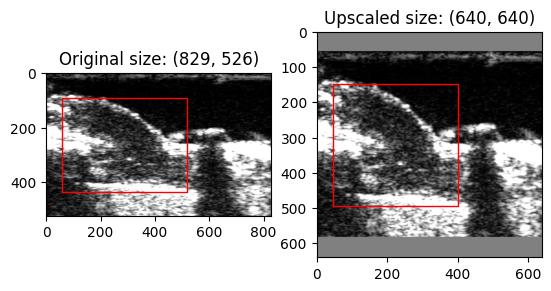

<Figure size 640x480 with 0 Axes>

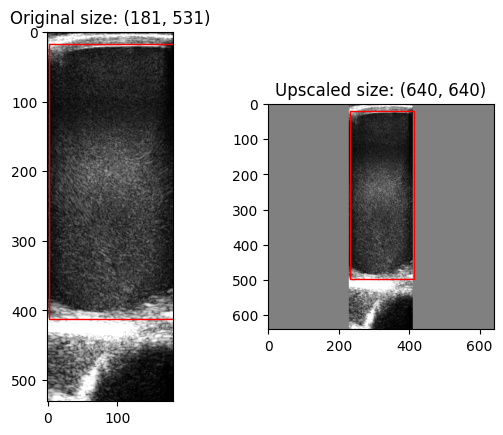

In [5]:
#Example of images
image_path_1 = "/Volumes/T7/Master/Data_augment/PNGImages/5003c0c2-52bc-491c-a673-09853906a82f_21_aug.png" 
image_path_2 = "/Volumes/T7/Master/Data_augment/PNGImages/0dc13655-c877-4d83-8b65-22f434b51ff2_32.png" 
#59, 92, 518, 438
#2, 17, 183, 412

resize_(image_path_1, 59, 92, 518, 438)
resize_(image_path_2, 2, 17, 183, 412)